# Sketch Recognition using Simple Neural Network (NN)

In [9]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
# %tensorflow_version 2.x

In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import platform
import pathlib

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.6
Tensorflow version: 2.1.0
Keras version: 2.2.4-tf


In [11]:
cache_dir = 'tmp';

In [12]:
# Create cache folder.
!mkdir tmp

mkdir: tmp: File exists


## TFDS?

In [13]:
# List all available datasets to see how the wikipedia dataset is called.
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'i_natura

In [41]:
DATASET_NAME = 'quickdraw_bitmap'

dataset, dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir=cache_dir,
    with_info=True,
    split=tfds.Split.TRAIN,
)

In [42]:
print(dataset_info)

tfds.core.DatasetInfo(
    name='quickdraw_bitmap',
    version=3.0.0,
    description='The Quick Draw Dataset is a collection of 50 million drawings across 345 categories, contributed by players of the game Quick, Draw!. The bitmap dataset contains these drawings converted from vector format into 28x28 grayscale images',
    homepage='https://github.com/googlecreativelab/quickdraw-dataset',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=345),
    }),
    total_num_examples=50426266,
    splits={
        'train': 50426266,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/HaE17,
      author    = {David Ha and
                   Douglas Eck},
      title     = {A Neural Representation of Sketch Drawings},
      journal   = {CoRR},
      volume    = {abs/1704.03477},
      year      = {2017},
      url       = {http://arxiv.org/abs/1704.03477

In [43]:
image_shape = dataset_info.features['image'].shape
num_classes = dataset_info.features['label'].num_classes
num_examples = dataset_info.splits['train'].num_examples

print('num_examples: ', num_examples)
print('image_shape: ', image_shape)
print('num_classes: ', num_classes)

num_examples:  50426266
image_shape:  (28, 28, 1)
num_classes:  345


In [88]:
label_index_to_string = dataset_info.features['label'].int2str

classes = []

for class_index in range(num_classes):
    classes.append(label_index_to_string(class_index))
    
print(classes)

['aircraft carrier', 'airplane', 'alarm clock', 'ambulance', 'angel', 'animal migration', 'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball bat', 'baseball', 'basket', 'basketball', 'bat', 'bathtub', 'beach', 'bear', 'beard', 'bed', 'bee', 'belt', 'bench', 'bicycle', 'binoculars', 'bird', 'birthday cake', 'blackberry', 'blueberry', 'book', 'boomerang', 'bottlecap', 'bowtie', 'bracelet', 'brain', 'bread', 'bridge', 'broccoli', 'broom', 'bucket', 'bulldozer', 'bus', 'bush', 'butterfly', 'cactus', 'cake', 'calculator', 'calendar', 'camel', 'camera', 'camouflage', 'campfire', 'candle', 'cannon', 'canoe', 'car', 'carrot', 'castle', 'cat', 'ceiling fan', 'cell phone', 'cello', 'chair', 'chandelier', 'church', 'circle', 'clarinet', 'clock', 'cloud', 'coffee cup', 'compass', 'computer', 'cookie', 'cooler', 'couch', 'cow', 'crab', 'crayon', 'crocodile', 'crown', 'cruise ship', 'cup', 'diamond', 'dishwasher', 'diving board', 'dog', 'dolphin', 

In [44]:
print(dataset)

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


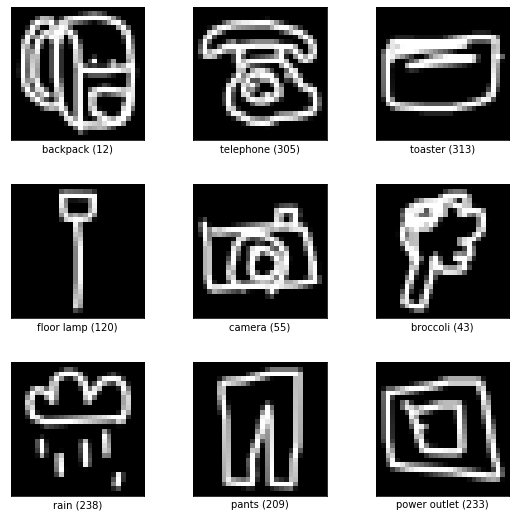

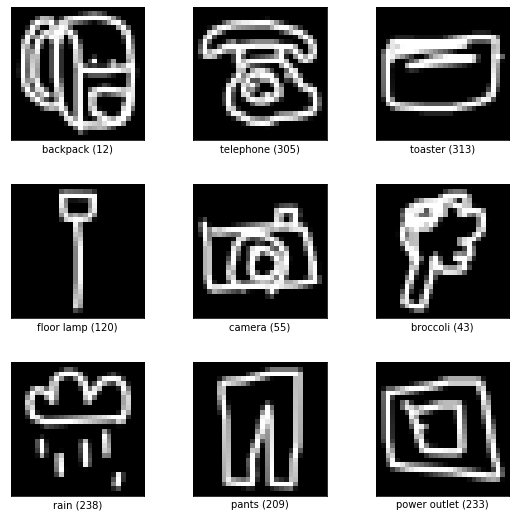

In [48]:
tfds.show_examples(dataset_info, dataset)

In [96]:
for example in dataset.take(1):
    image = example['image']
    label = example['label']
    
    class_index = label.numpy()
    class_name = label_index_to_string(class_index)
    
    print('{} ({})'.format(class_name, class_index), '\n')
    print('Image shape: ', image.shape, '\n')
    print(image.numpy())

backpack (12) 

Image shape:  (28, 28, 1) 

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  3]
  [ 31]
  [ 63]
  [ 95]
  [115]
  [ 86]
  [ 50]
  [  2]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 75]
  [183]
  [176]
  [152]
  [ 10]
  [ 54]
  [182]
  [222]
  [250]
  [255]
  [255]
  [255]
  [255]
  [255]
  [255]
  [231]
  [151]
  [ 61]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [129]
  [255]
  [216]
  [202]
  [255]
  [ 98]
  [220]
  [222]
  [157]
  [125]
  [ 93]
  [ 60]
  [ 28]
  [  8]
  [ 38]
  [ 82]
  [162]
  [239]
  [254]
  [108]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [ 33]
  [250]
  [158]
  [ 

In [104]:
def dataset_preview(dataset, image_shape, preview_images_num=25):
    num_cells = math.ceil(math.sqrt(preview_images_num))
    plt.figure(figsize=(10, 10))
    image_size = image_shape[0]
    
    for image_index, example in enumerate(dataset.take(preview_images_num)):
        image = example['image']
        label = example['label']
        
        class_index = label.numpy()
        class_name = label_index_to_string(class_index)
        
        plt.subplot(num_cells, num_cells, image_index + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(
            np.reshape(image, (image_size, image_size)),
            cmap=plt.cm.binary
        )
        plt.xlabel('{} ({})'.format(class_name, class_index))
    plt.show()

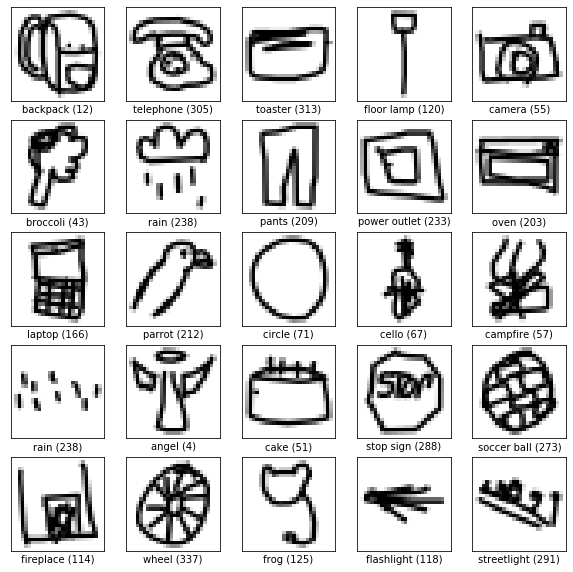

In [105]:
dataset_preview(dataset, image_shape)

## Load labels

In [5]:
def load_quick_draw_labels(cache_dir=cache_dir):
    labels_url = 'https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/categories.txt'
    labels_file_name = 'categories.txt'
    
    labels_path = tf.keras.utils.get_file(
        fname=labels_file_name, 
        origin=labels_url,
        cache_dir=pathlib.Path(cache_dir).absolute()
    )
    
    labels_file = open(labels_path, 'r')
    labels = labels_file.read().splitlines()
    labels_file.close()
    
    labels = [label.replace(' ', '_') for label in labels]
    
    return np.array(labels)

In [6]:
labels = load_quick_draw_labels()

print()
print('labels:\n', labels)


labels:
 ['aircraft_carrier' 'airplane' 'alarm_clock' 'ambulance' 'angel'
 'animal_migration' 'ant' 'anvil' 'apple' 'arm' 'asparagus' 'axe'
 'backpack' 'banana' 'bandage' 'barn' 'baseball' 'baseball_bat' 'basket'
 'basketball' 'bat' 'bathtub' 'beach' 'bear' 'beard' 'bed' 'bee' 'belt'
 'bench' 'bicycle' 'binoculars' 'bird' 'birthday_cake' 'blackberry'
 'blueberry' 'book' 'boomerang' 'bottlecap' 'bowtie' 'bracelet' 'brain'
 'bread' 'bridge' 'broccoli' 'broom' 'bucket' 'bulldozer' 'bus' 'bush'
 'butterfly' 'cactus' 'cake' 'calculator' 'calendar' 'camel' 'camera'
 'camouflage' 'campfire' 'candle' 'cannon' 'canoe' 'car' 'carrot' 'castle'
 'cat' 'ceiling_fan' 'cello' 'cell_phone' 'chair' 'chandelier' 'church'
 'circle' 'clarinet' 'clock' 'cloud' 'coffee_cup' 'compass' 'computer'
 'cookie' 'cooler' 'couch' 'cow' 'crab' 'crayon' 'crocodile' 'crown'
 'cruise_ship' 'cup' 'diamond' 'dishwasher' 'diving_board' 'dog' 'dolphin'
 'donut' 'door' 'dragon' 'dresser' 'drill' 'drums' 'duck' 'dumbbell' 'e

## Download dataset

In [7]:
dataset_image_pixel_size = 28

In [8]:
def download_quick_draw_dataset(cache_dir=cache_dir): 
    labels = load_quick_draw_labels()
    
    dataset_base_url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    dataset_file_paths = []
    
    for label in labels:
        dataset_file_name = label + '.npy'
        dataset_url = dataset_base_url + label.replace('_', '%20') + '.npy'
            
        dataset_file_path = tf.keras.utils.get_file(
            fname=dataset_file_name, 
            origin=dataset_url,
            cache_dir=pathlib.Path(cache_dir).absolute()
        )
        
        dataset_file_paths.append(dataset_file_path)
    
    return dataset_file_paths

In [9]:
dataset_file_paths = download_quick_draw_dataset()

In [10]:
%ls -la ./tmp/datasets

total 79859192
drwxr-xr-x  348 trekhleb  staff      11136 Apr 27 13:51 ./
drwxr-xr-x    3 trekhleb  staff         96 Apr 27 12:19 ../
-rw-r--r--    1 trekhleb  staff  105684064 Apr 27 13:44 The_Eiffel_Tower.npy
-rw-r--r--    1 trekhleb  staff  151323840 Apr 27 13:45 The_Great_Wall_of_China.npy
-rw-r--r--    1 trekhleb  staff   95164352 Apr 27 13:45 The_Mona_Lisa.npy
-rw-r--r--    1 trekhleb  staff   91339216 Apr 27 12:19 aircraft_carrier.npy
-rw-r--r--    1 trekhleb  staff  118872512 Apr 27 12:19 airplane.npy
-rw-r--r--    1 trekhleb  staff   96744896 Apr 27 12:19 alarm_clock.npy
-rw-r--r--    1 trekhleb  staff  116035216 Apr 27 12:42 ambulance.npy
-rw-r--r--    1 trekhleb  staff  117393104 Apr 27 12:42 angel.npy
-rw-r--r--    1 trekhleb  staff  108072128 Apr 27 12:42 animal_migration.npy
-rw-r--r--    1 trekhleb  staff   97695888 Apr 27 12:42 ant.npy
-rw-r--r--    1 trekhleb  staff   98965184 Apr 27 12:42 anvil.npy
-rw-r--r--    1 trekhleb  staff  113462128 Apr 27 12:43 apple.npy
-rw-

## Generate datasets

In [11]:
def generate_quick_draw_dataset(
    examples_per_label,
    test_ratio=0.2,
    validation_ratio=0.1,
    cache_dir=cache_dir
):
    labels = load_quick_draw_labels()
    
    pixels_per_drawing = dataset_image_pixel_size * dataset_image_pixel_size
    
    x = np.empty(shape=(0, pixels_per_drawing));
    y = np.empty(shape=(0), dtype=np.int32);
    
    for label_index, label in enumerate(labels):
        dataset_file_path = cache_dir + '/datasets/' + label + '.npy'
        images = np.load(dataset_file_path, allow_pickle=False)
        
        images = images[:examples_per_label]
        
        (batch_size, pixels) = images.shape
        
        images_labels = np.full(
            shape=batch_size,
            fill_value=label_index,
            dtype=np.int32
        )

        x = np.concatenate((x, images), axis=0)
        y = np.append(y, images_labels)
           
    permutated_indicex = np.random.permutation(y.shape[0])  
    x = x[permutated_indicex, :]
    y = y[permutated_indicex]
    
    test_dataset_size = int(x.shape[0] * test_ratio)
    validation_dataset_size = int(x.shape[0] * validation_ratio)
    
    x_test = x[0:test_dataset_size, :]
    y_test = y[0:test_dataset_size]
    
    x_val = x[test_dataset_size:(test_dataset_size + validation_dataset_size), :]
    y_val = y[test_dataset_size:(test_dataset_size + validation_dataset_size)]
    
    x_train = x[(test_dataset_size + validation_dataset_size):, :]
    y_train = y[(test_dataset_size + validation_dataset_size):]

    return x_train, y_train, x_test, y_test, x_val, y_val, labels 

In [ ]:
x_train, y_train, x_test, y_test, x_val, y_val, labels = generate_quick_draw_dataset(
    examples_per_label=100
)

print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print()

print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)
print()

print('x_val.shape: ', x_val.shape)
print('y_val.shape: ', y_val.shape)
print()

print('labels.shape: ', labels.shape)

## Preview datasets

In [ ]:
print(x_train[0])

In [ ]:
print(y_train[:10])

In [ ]:
def dataset_preview(x, y, labels, preview_images_num=25):
    images_num = x.shape[0] if x.shape[0] < preview_images_num else preview_images_num
    num_cells = math.ceil(math.sqrt(images_num))
    plt.figure(figsize=(10, 10))
    image_size = int(math.sqrt(x[0].shape[0]))
    for image_index in range(images_num):
        plt.subplot(num_cells, num_cells, image_index + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(
            np.reshape(x[image_index], (image_size, image_size)),
            cmap=plt.cm.binary
        )
        plt.xlabel(labels[y[image_index]])
    plt.show()

In [ ]:
print('Train dataset sample:')
dataset_preview(x_train, y_train, labels)

In [ ]:
print('Test dataset sample:')
dataset_preview(x_test, y_test, labels)

In [ ]:
print('Validation dataset sample:')
dataset_preview(x_val, y_val, labels)

## Pre-process dataset

In [ ]:
# Normalize pixel values.
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0
x_val_norm = x_val / 255.0

# Convert class vectors to class matrices.
y_train_categorical = tf.keras.utils.to_categorical(y_train, len(labels))
y_test_categorical = tf.keras.utils.to_categorical(y_test, len(labels))
y_val_categorical = tf.keras.utils.to_categorical(y_val, len(labels))

In [ ]:
print('x_train_norm.shape:', x_train_norm.shape)

In [ ]:
print(x_train_norm[0])

In [ ]:
print('y_train_categorical.shape: ', y_train_categorical.shape, '\n')
print('y_train_categorical:\n', y_train_categorical, '\n')
print('y_train[0]:\n', y_train[0], '\n')
print('y_train_categorical[0]:\n', y_train_categorical[0])

## Create model

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(
    input_shape=x_train_norm.shape[1:] # 784=28*28
))

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
))

model.add(tf.keras.layers.Dense(
    units=len(labels),
    activation=tf.keras.activations.softmax
))

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

## Train model

In [ ]:
epochs = 10

In [ ]:
training_history = model.fit(
    x=x_train_norm,
    y=y_train_categorical,
    epochs=epochs,
    validation_data=(x_val_norm, y_val_categorical),
)

In [ ]:
# Renders the charts for training accuracy and loss.
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

In [ ]:
render_training_history(training_history)

## Evaluate model accuracy

### Training set accuracy

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train_categorical)

In [ ]:
print('Training loss: ', '{:.2f}'.format(train_loss))
print('Training accuracy: ', '{:.2f}'.format(train_accuracy))

### Test set accuracy

In [ ]:
%%capture
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test_categorical)

In [ ]:
print('Test loss: ', '{:.2f}'.format(test_loss))
print('Test accuracy: ', '{:.2f}'.format(test_accuracy))